Data visualization project

# Introduciton
#### Aims:

This script will overview and visualize whether there is a relationship between economic performance of a country and life expectancy of its citizens.

#### Questions:

Has life expectancy increased during the observed period?

Has GDP increased during the observed period?

Is there a correlation between life expectancy and GDP of a country?

What is the average life expectancy in across the sample countries?


#### Sample: 
    
Countries: Chile, China, Germany, Mexico, U.S.A, Zimbabwe

#### Sources: 

GDP: World Bank national accounts data, and OECD National Accounts data files.
Life expectancy Data Source: World Health Organization

## Import modules
Import basic libraries

In [3]:
import pandas as pd
import numpy as np
from tabulate import tabulate as tb
from prettytable import PrettyTable as pt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import getcontext, Decimal

# Investigate the data
First, load the data into DataFrames to visualize and inspect it.
Store **all_data.csv** into a DataFrame `data` and print it out using `head()` command.

In [4]:
data = pd.read_csv('all_data.csv')
data.head(5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Second, there are 96 observations of rows and 4 columns in data. 

In [5]:
data.shape

(96, 4)

## Explore the sample
Third, the sample covers 6 countries (Chile, China, Germany, Mexico, U.S.A, Zimbabwe) across 15 years period (from 2000 to 2015)

In [6]:
country_list = data.Country.unique()
year_list = data.Year.unique()
print(country_list)
print(year_list)


['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### Edit data before the analysis.
It order to perform analysis it would be better to change a "descriptive" name of a `Life expectancy at birth (years)` variable in more convenient form `Lifexp`.
As soon as GDP data presented in large numbers, it would be better to format it into billions.

In [7]:
data.rename(columns = {'Life expectancy at birth (years)':'Lifexp'}, inplace = True)
data['Country'].replace("United States of America", "U.S.A", inplace = True)
data['GDP_billions'] = data['GDP'] / 1000000000
data = data.drop(["GDP"], axis =1)
data.head(5)

,Country,Year,Lifexp,GDP_billions
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


## Variables distribution

### GDP distribution
GDP observations are right skewered distributed and the distribution shows us that 

<Figure size 200x100 with 0 Axes>

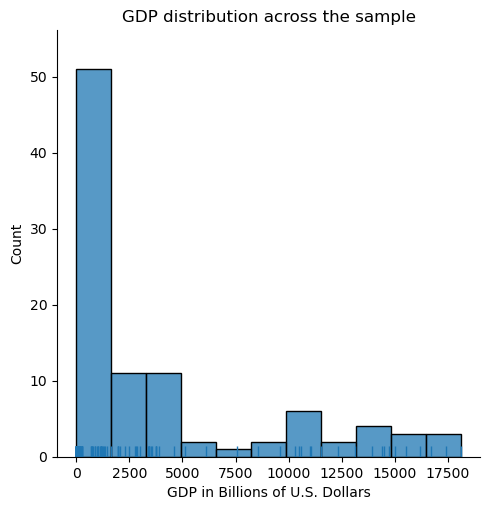

In [8]:
plt.figure(figsize=(2,1))
sns.displot(data.GDP_billions, rug = True)
plt.title("GDP distribution across the sample")
plt.xlabel("GDP in Billions of U.S. Dollars");

The GDP distribution is right-skewered and majority of values are one the left side. Most of countries observation cases of GDP ranges from 4.4 USD billions to 5000 USD billions.

### GDP minimum, maximum, mean

In [9]:
GDP_min = np.min(data.GDP_billions)
GDP_max = np.max(data.GDP_billions)
GDP_mean = np.mean(data.GDP_billions)

print(f'Minimum value for GPD in the sample (billions USD): {GDP_min:.2f} ')
print(f'Maximum value for GPD in the sample (billions USD): {GDP_max:.2f} ')
print(f'Mean value for GPD in the sample (billions USD): {GDP_mean:.2f} ')

Minimum value for GPD in the sample (billions USD): 4.42 
Maximum value for GPD in the sample (billions USD): 18100.00 
Mean value for GPD in the sample (billions USD): 3880.50 


### Life expectancy distribution

<Figure size 200x100 with 0 Axes>

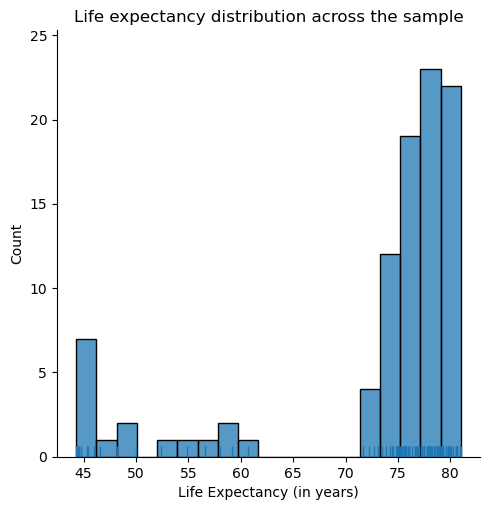

In [10]:
plt.figure(figsize=(2,1))
sns.displot(data.Lifexp, rug = True)
plt.title("Life expectancy distribution across the sample")
plt.xlabel("Life Expectancy (in years)");

The life expectancy distribution is left-skewered. Most of observations ranges from 73 to 81 years.

### Life expectancy minimum, maximum, mean

In [11]:
lifeexp_min = np.min(data.Lifexp)
lifeexp_max = np.max(data.Lifexp)
lifeexp_mean = np.mean(data.Lifexp)

print(f"Minimum life expectancy in the sample is: {lifeexp_min:.0f} years")
print(f"Maximum life expectancy in the sample is: {lifeexp_max:.0f} years")
print(f"Mean life expectancy in the sample is: {lifeexp_mean:.0f} years")

Minimum life expectancy in the sample is: 44 years
Maximum life expectancy in the sample is: 81 years
Mean life expectancy in the sample is: 73 years


### Mean distribution by country


In [12]:
data_avg = data.drop("Year", axis = 1).groupby("Country").mean().sort_values(by = "GDP_billions", ascending = False).reset_index()
data_avg

,Country,Lifexp,GDP_billions
0,U.S.A,78.06250,14075.000000
1,China,74.26250,4957.713750
2,Germany,79.65625,3094.775625
3,Mexico,75.71875,976.650625
4,Chile,78.94375,169.788845
5,Zimbabwe,50.09375,9.062580


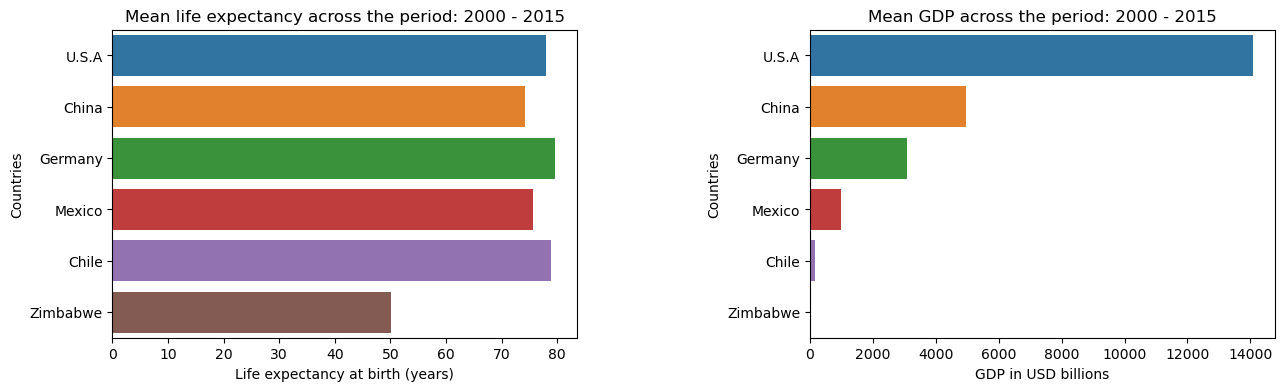

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.barplot(x="Lifexp", y="Country", data=data_avg, ax = ax1)
sns.barplot(x="GDP_billions", y="Country", data=data_avg, ax = ax2)
ax1.set_title('Mean life expectancy across the period: 2000 - 2015')
ax1.set_xlabel('Life expectancy at birth (years)')
ax1.set_ylabel('Countries')
ax2.set_title('Mean GDP across the period: 2000 - 2015')
ax2.set_xlabel('GDP in USD billions')
ax2.set_ylabel('Countries')
#fig.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

By the dint of the table and graph above, U.S.A., China and Germany have the highest average GDP across the preiod from 2000 to 2015. 
Nevertheless, Germany has the highest average life expectancy across the sample.
Zimbabwe has the smallest average GDP and life expectancy.

## Time series analysis

### GDP growth analysis

Plot a time-series GDP growth plot.

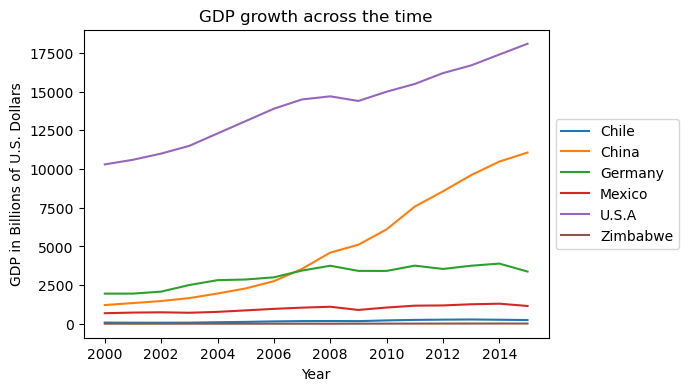

In [14]:
plt.figure(figsize=(6,4))
sns.lineplot(x=data.Year, y=data.GDP_billions, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("GDP growth across the time")
plt.ylabel("GDP in Billions of U.S. Dollars");

Pivot table of a 2000 and 2015 GDP value difference by countries.

In [15]:
df_filtered = data[data['Year'].isin([2000, 2015])]
data_GDP_2000_2015 = pd.pivot_table(df_filtered, index='Country', columns='Year', values='GDP_billions').reset_index()
data_GDP_2000_2015 = data_GDP_2000_2015.rename(columns={2000: 'gdp_billions_2000', 2015: 'gdp_billions_2015'})
data_GDP_2000_2015['total_growth'] = data_GDP_2000_2015.gdp_billions_2015 - data_GDP_2000_2015.gdp_billions_2000
print(data_GDP_2000_2015)

Year   Country  gdp_billions_2000  gdp_billions_2015  total_growth
0        Chile          77.860932         242.518000    164.657068
1        China        1211.350000       11064.700000   9853.350000
2      Germany        1949.950000        3375.610000   1425.660000
3       Mexico         683.648000        1152.260000    468.612000
4        U.S.A       10300.000000       18100.000000   7800.000000
5     Zimbabwe           6.689958          16.304668      9.614710


U.S.A. and China GDP substantially increased during the observed period 2000-2015 by 9853 and 7800 billions of dollars respectively.

### Life expectancy growth analysis.

Plot a time-series life expectancy growth plot.

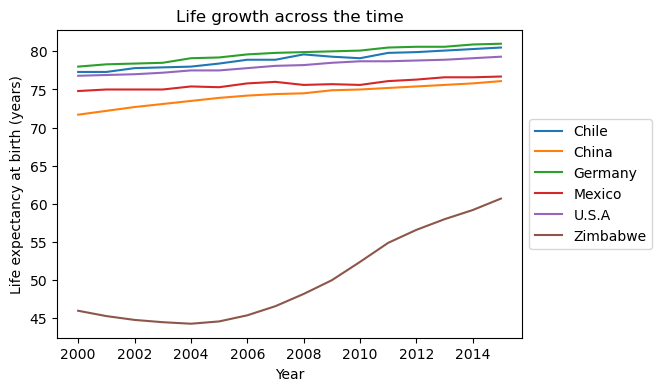

In [17]:
plt.figure(figsize=(6,4))
sns.lineplot(x=data.Year, y=data.Lifexp, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Life growth across the time")
plt.ylabel("Life expectancy at birth (years)");

Pivot table of a 2000 and 2015 GDP value difference by countries.

In [18]:
data_lifexp_2000_2015 = pd.pivot_table(df_filtered, index='Country', columns='Year', values='Lifexp').reset_index()
data_lifexp_2000_2015 = data_lifexp_2000_2015.rename(columns={2000: 'life_exp_2000', 2015: 'life_exp_2015'})
data_lifexp_2000_2015['life_exp_growth'] = data_lifexp_2000_2015.life_exp_2015 - data_lifexp_2000_2015.life_exp_2000
print(data_lifexp_2000_2015)

Year   Country  life_exp_2000  life_exp_2015  life_exp_growth
0        Chile           77.3           80.5              3.2
1        China           71.7           76.1              4.4
2      Germany           78.0           81.0              3.0
3       Mexico           74.8           76.7              1.9
4        U.S.A           76.8           79.3              2.5
5     Zimbabwe           46.0           60.7             14.7


Beside the fact that Zimbabwe has the smallest GDP indicators (across the sample), it leads in life expectancy growth. 

## GDP and life expectancy correlation visualization.

The following graph shows the simultaneous growth of life expectancy and GDP across the sample.

U.S.A. and China have similar rapid growth.

Zimbabwe slope is flat showing no substantial GDP growth, however life expectancy of that country has the most significant growth.

Text(0, 0.5, 'GDP in Billions of U.S. Dollars')

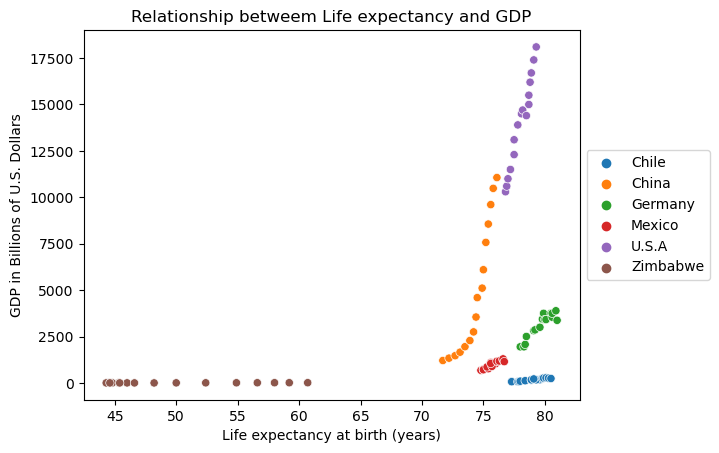

In [22]:
sns.scatterplot(x=data.Lifexp, y=data.GDP_billions, hue=data.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.title("Relationship betweem Life expectancy and GDP")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Billions of U.S. Dollars")

Upon examining individual countries, it appears that most nations such as the United States, Mexico, and Zimbabwe exhibit a linear correlation between GDP and life expectancy. However, China's curve follows a slightly exponential pattern, and Chile's curve shows a logarithmic trend. Despite these variations, the overall trend reveals a positive correlation between GDP and life expectancy, indicating an increase in both variables.

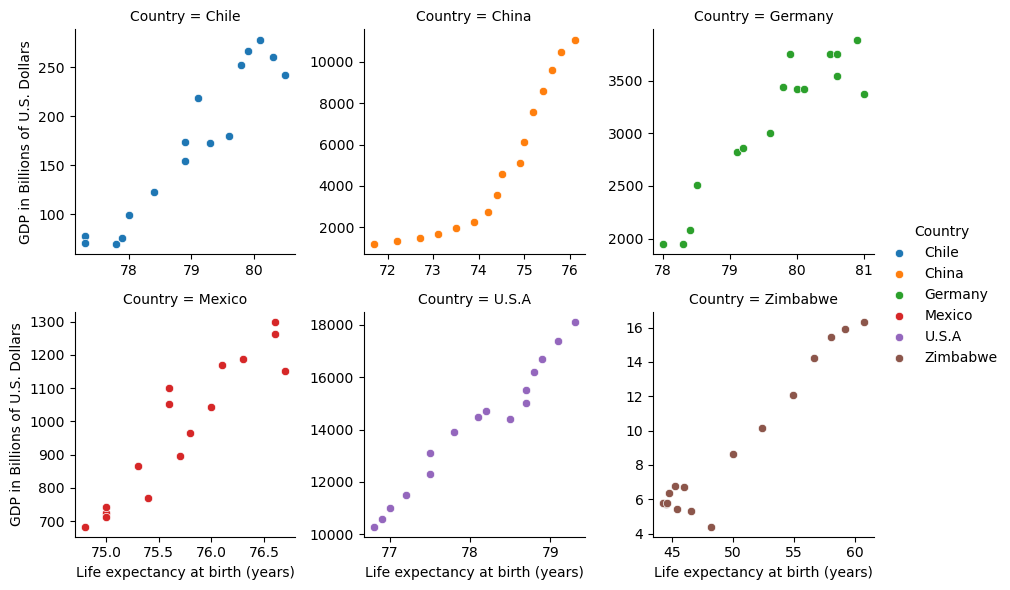

In [29]:
graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Lifexp", "GDP_billions")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Billions of U.S. Dollars"));

# Conclusions

This project visualized data from GDP and life expectancy data of 6 countries across 15 years.
By the dint of the analysis above, there are answers on questions posted above:

Has life expectancy increased during the observed period?
+ Yes, Zimbabwe has the greatest life expectancy growth.

Has GDP increased during the observed period?
+ GDP grew during the 15 years period, especially for the U.S., China and Germany.

Is there a correlation between life expectancy and GDP of a country?
+ Yes, there is a correlation between GDP and life expectancy.

What is the average life expectancy in across the sample countries?
+ Average life expectancy of the sample is 73 years, nevertheless, Zimbabwe has 50 years of average life expectancy.